In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,NaN,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	26
float64		column 2	15
float64		column 3	25
float64		column 4	16
float64		column 5	10
float64		column 6	21
float64		column 7	31
float64		column 8	25
float64		column 9	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,188.000000,199.000000,189.000000,198.000000,204.000000,193.000000,183.000000,189.000000,199.000000
mean,1.518130,13.412010,2.785926,1.444141,72.629118,0.502332,8.964426,0.175291,0.052362
std,0.002774,0.800631,1.359829,0.483716,0.761085,0.672708,1.447103,0.501938,0.092491
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.790000,0.000000,0.000000
25%,1.516498,12.950000,2.410000,1.190000,72.275000,0.140000,8.235000,0.000000,0.000000
50%,1.517620,13.330000,3.480000,1.365000,72.775000,0.550000,8.600000,0.000000,0.000000
75%,1.518985,13.805000,3.600000,1.620000,73.080000,0.600000,9.160000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

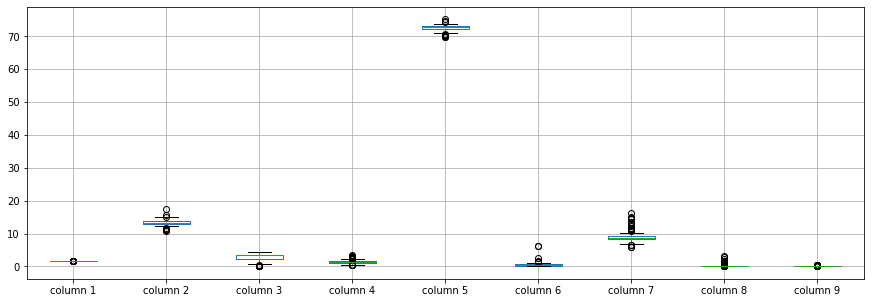

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518130
column 2    13.412010
column 3     2.785926
column 4     1.444141
column 5    72.629118
column 6     0.502332
column 7     8.964426
column 8     0.175291
column 9     0.052362
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.022389,-0.049692,-0.448941,-0.507490,-0.280123,0.786399,-0.186000,0.110594
column 2,-0.022389,1.000000,-0.244653,0.150656,-0.118559,-0.234357,-0.325313,0.243961,-0.258714
column 3,-0.049692,-0.244653,1.000000,-0.450882,-0.157903,0.074051,-0.441054,-0.480019,0.030078
column 4,-0.448941,0.150656,-0.450882,1.000000,-0.018258,0.380938,-0.276945,0.518756,-0.066901
column 5,-0.507490,-0.118559,-0.157903,-0.018258,1.000000,-0.224725,-0.191198,-0.112946,-0.077381
column 6,-0.280123,-0.234357,0.074051,0.380938,-0.224725,1.000000,-0.311994,-0.047009,-0.020750
column 7,0.786399,-0.325313,-0.441054,-0.276945,-0.191198,-0.311994,1.000000,-0.076187,0.141457
column 8,-0.186000,0.243961,-0.480019,0.518756,-0.112946,-0.047009,-0.076187,1.000000,-0.034363
column 9,0.110594,-0.258714,0.030078,-0.066901,-0.077381,-0.020750,0.141457,-0.034363,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+28,9+28+28,9+28+28+28,9+28+28+28+28,9+28+28+28+28+28,9+28+28+28+28,9+28+28+28,9+28+28,9+28,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 96.08165036714993
Epoch: 1 , loss: 96.26476229154147
Epoch: 2 , loss: 95.94816648043118
Epoch: 3 , loss: 96.30731259859525
Epoch: 4 , loss: 95.956298828125
Epoch: 5 , loss: 95.89499840369591
Epoch: 6 , loss: 96.3388442993164
Epoch: 7 , loss: 95.9566151545598
Epoch: 8 , loss: 95.83296027550331
Epoch: 9 , loss: 96.22330298790565
Epoch: 10 , loss: 95.81673079270583
Epoch: 11 , loss: 95.85370753361629
Epoch: 12 , loss: 95.77497805081882
Epoch: 13 , loss: 95.85698523888222
Epoch: 14 , loss: 96.26929356501653
Epoch: 15 , loss: 96.18723531869742
Epoch: 16 , loss: 95.92799846942609
Epoch: 17 , loss: 95.84664799616887
Epoch: 18 , loss: 95.93314772385817
Epoch: 19 , loss: 96.06685873178336
Epoch: 20 , loss: 95.8699728158804
Epoch: 21 , loss: 95.87733283409706
Epoch: 22 , loss: 95.88643880990836
Epoch: 23 , loss: 95.88070385272687
Epoch: 24 , loss: 96.3310805100661
Epoch: 25 , loss: 95.82670123760516
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.053144
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
210,0.0,0.0,0.0,-1.886855,0.000000,0.0,0.0,0.00000,0.000000
211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-1.60357,0.000000
212,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(242.2632477636971, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.22217099568802368

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.100000,71.780000,0.06,8.75,0.00000,0.053144
1,1.51761,13.89,3.60,1.360000,72.730000,0.48,7.83,0.00000,0.000000
2,1.51618,13.53,3.55,1.540000,72.990000,0.39,7.78,0.00000,0.000000
3,1.51766,13.21,3.69,1.290000,72.610000,0.57,8.22,0.00000,0.000000
4,1.51742,13.27,3.62,1.240000,73.080000,0.55,8.07,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.880000,72.610000,0.08,9.18,1.06000,0.000000
210,1.51685,14.92,0.00,0.103145,73.060000,0.00,8.40,1.59000,0.000000
211,1.52065,14.36,0.00,2.020000,73.420000,0.00,8.44,0.03643,0.000000
212,1.51651,14.38,0.00,1.940000,73.610000,0.00,8.48,1.57000,0.000000


In [20]:
imputations[-1].to_excel("Glass_NN_10(imp).xlsx", index=False, header=False)